In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree 
import graphviz
import numpy as np

In [3]:
colonias_df = pd.read_csv("dataset/colonias_Y_norm_labeled.csv")

In [4]:
colonias_df.shape

(1939, 101)

In [5]:
colonias_df['st_name'].value_counts()

Texas         1726
New Mexico      95
Arizona         84
California      34
Name: st_name, dtype: int64

In [6]:
grp = colonias_df.groupby('label')
label_counts = []
for label, value in grp:
    # print('label=', label, ',count=', len(value['label']))
    label_counts.append({'label':label, 'count':len(value['label'])})
label_counts = sorted(label_counts, key=lambda x:-x['count'])
top_cluster_labels = [ e['label'] for e in label_counts[:10]] # get top10 clusters
top_clusters_df = colonias_df[colonias_df['label'].isin(top_cluster_labels)]

In [7]:
columns = ['estimatedp', 'wtr_srcdes', 'wtr_hauled', 'priv_wells', \
               'wc_exists', 'wc_adeq', 'wc_hlth', 'ww_public', 'ppl_nowat_r', 'ppl_noww_r', 'ppl_yeswat_r', 'ppl_yesww_r']

feature_cols = ['estimatedp', 'wtr_srcdes', 'wtr_hauled', 'priv_wells', \
               'wc_exists', 'wc_adeq', 'wc_hlth', 'ww_public', 'ppl_nowat_r', 'ppl_noww_r', 'ppl_yeswat_r', 'ppl_yesww_r']
#X = csv_df[feature_cols]
X = top_clusters_df[feature_cols]
X_norm = X.copy()
new_feature_cols = ['Estimated Population', 'Water Source Des',  'Water Hauled', 'Private Wells', \
                    'Has Public Water Service', 'Service is Adequate', 'Water Health Hazard', 'Served by Public Sewer',\
           'Num People Without Water(%)', 'Num People Without Wastewater(%)', 'Num People With Water(%)',\
           'Num People With Wastewater(%)']
X_norm.columns = new_feature_cols

X_norm = pd.get_dummies(X_norm, columns=['Water Source Des', 'Water Hauled', 'Private Wells',  'Has Public Water Service', \
                                         'Service is Adequate', 'Water Health Hazard', 'Served by Public Sewer'])
Y = top_clusters_df.label

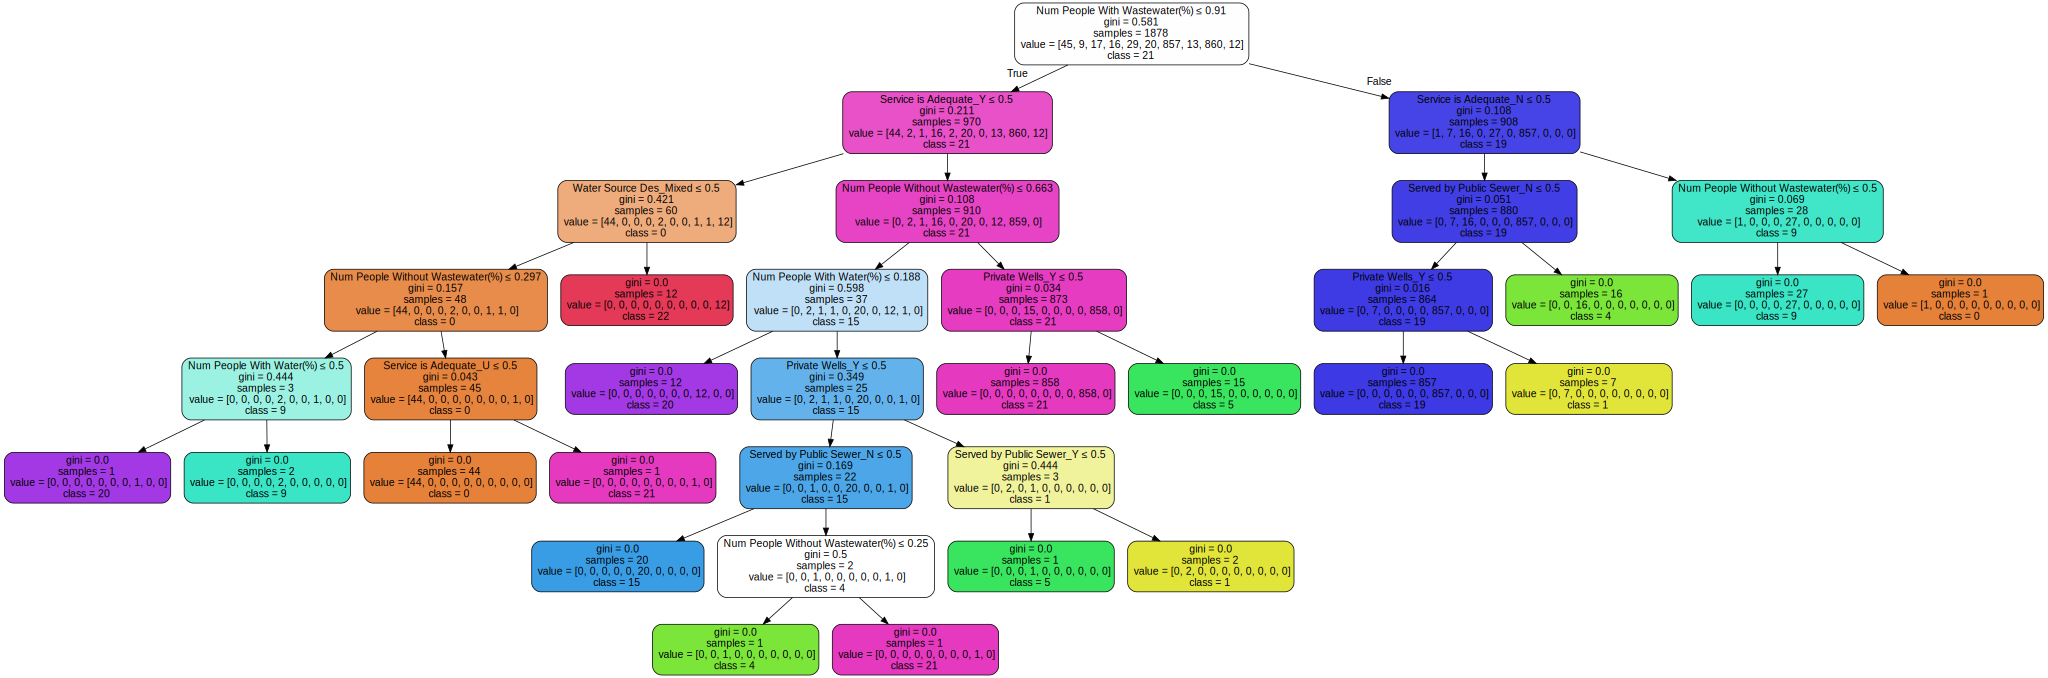

In [8]:
clf_cln = tree.DecisionTreeClassifier(max_depth=8)
clf_cln = clf_cln.fit(X_norm, Y)
class_names = [str(e) for e in np.unique(Y)]
dot_data=tree.export_graphviz(clf_cln, out_file=None, feature_names=X_norm.columns,class_names=class_names,
                             filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [9]:
graph.render("colonias_N_top10_depth8")

'colonias_N_top10_depth8.pdf'

In [10]:
top10_counts = [cluster["count"] for cluster in label_counts[:10]]
sum(top10_counts)/217

8.654377880184331

In [11]:
label_counts

[{'label': 21, 'count': 860},
 {'label': 19, 'count': 857},
 {'label': 0, 'count': 45},
 {'label': 9, 'count': 29},
 {'label': 15, 'count': 20},
 {'label': 4, 'count': 17},
 {'label': 5, 'count': 16},
 {'label': 20, 'count': 13},
 {'label': 22, 'count': 12},
 {'label': 1, 'count': 9},
 {'label': 18, 'count': 9},
 {'label': 2, 'count': 8},
 {'label': 7, 'count': 7},
 {'label': 13, 'count': 7},
 {'label': 12, 'count': 5},
 {'label': 23, 'count': 5},
 {'label': 6, 'count': 4},
 {'label': 11, 'count': 4},
 {'label': 14, 'count': 4},
 {'label': 17, 'count': 4},
 {'label': 3, 'count': 1},
 {'label': 8, 'count': 1},
 {'label': 10, 'count': 1},
 {'label': 16, 'count': 1}]